In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
top_performers = pd.read_csv('Top_Performing_Currencies_YTD_2022.csv').sort_values(
    by='YTD Performance (%)').dropna()

#### Top/Bottom Spot Returns Exchange Rates

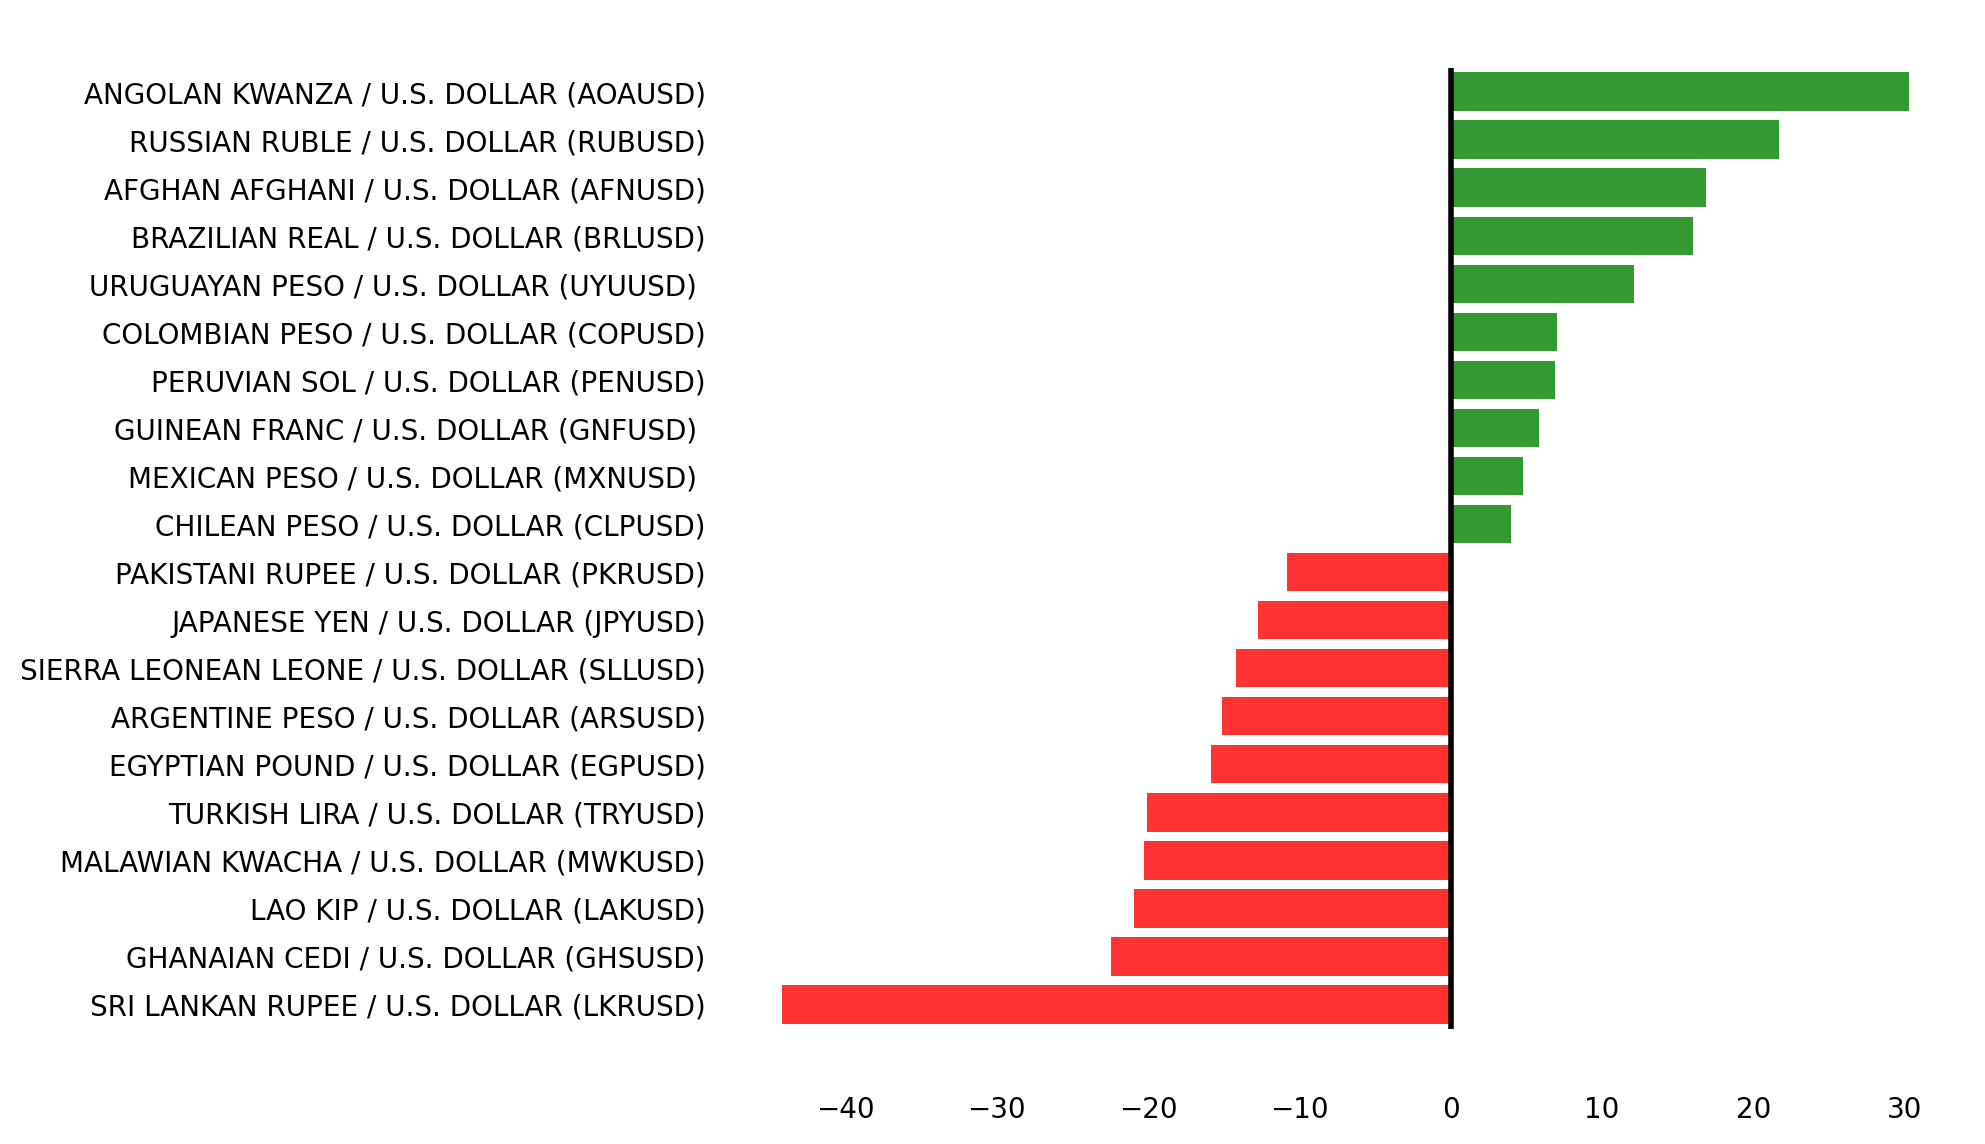

In [102]:
fig, ax = plt.subplots(figsize=(8,7), dpi=200)

colors = ["red" if x < 0 else "green" for x in top_performers["YTD Performance (%)"].values]
bars = ax.barh( top_performers["US Denominated Exchange Rates"],
               top_performers["YTD Performance (%)"], 
               align='center',
                color=colors, alpha=0.8,
                )

ax.vlines(0, -0.5, 19.5,color='black', linewidth=2)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')


for _spine in ["right", "top", "left", "bottom"]:
    ax.spines[_spine].set_visible(False)



#### Commodity Exports for Top Spot Returns

In [207]:
top_exports = pd.read_csv('Top_Exports_By_Category.csv')

In [208]:
ttt = top_exports.groupby(by=['Country','Category']).sum().reset_index()

In [209]:
ttt.groupby(by='Category').mean().index.tolist()

['Energy', 'Industrial', 'Metals', 'Other', 'Soft']

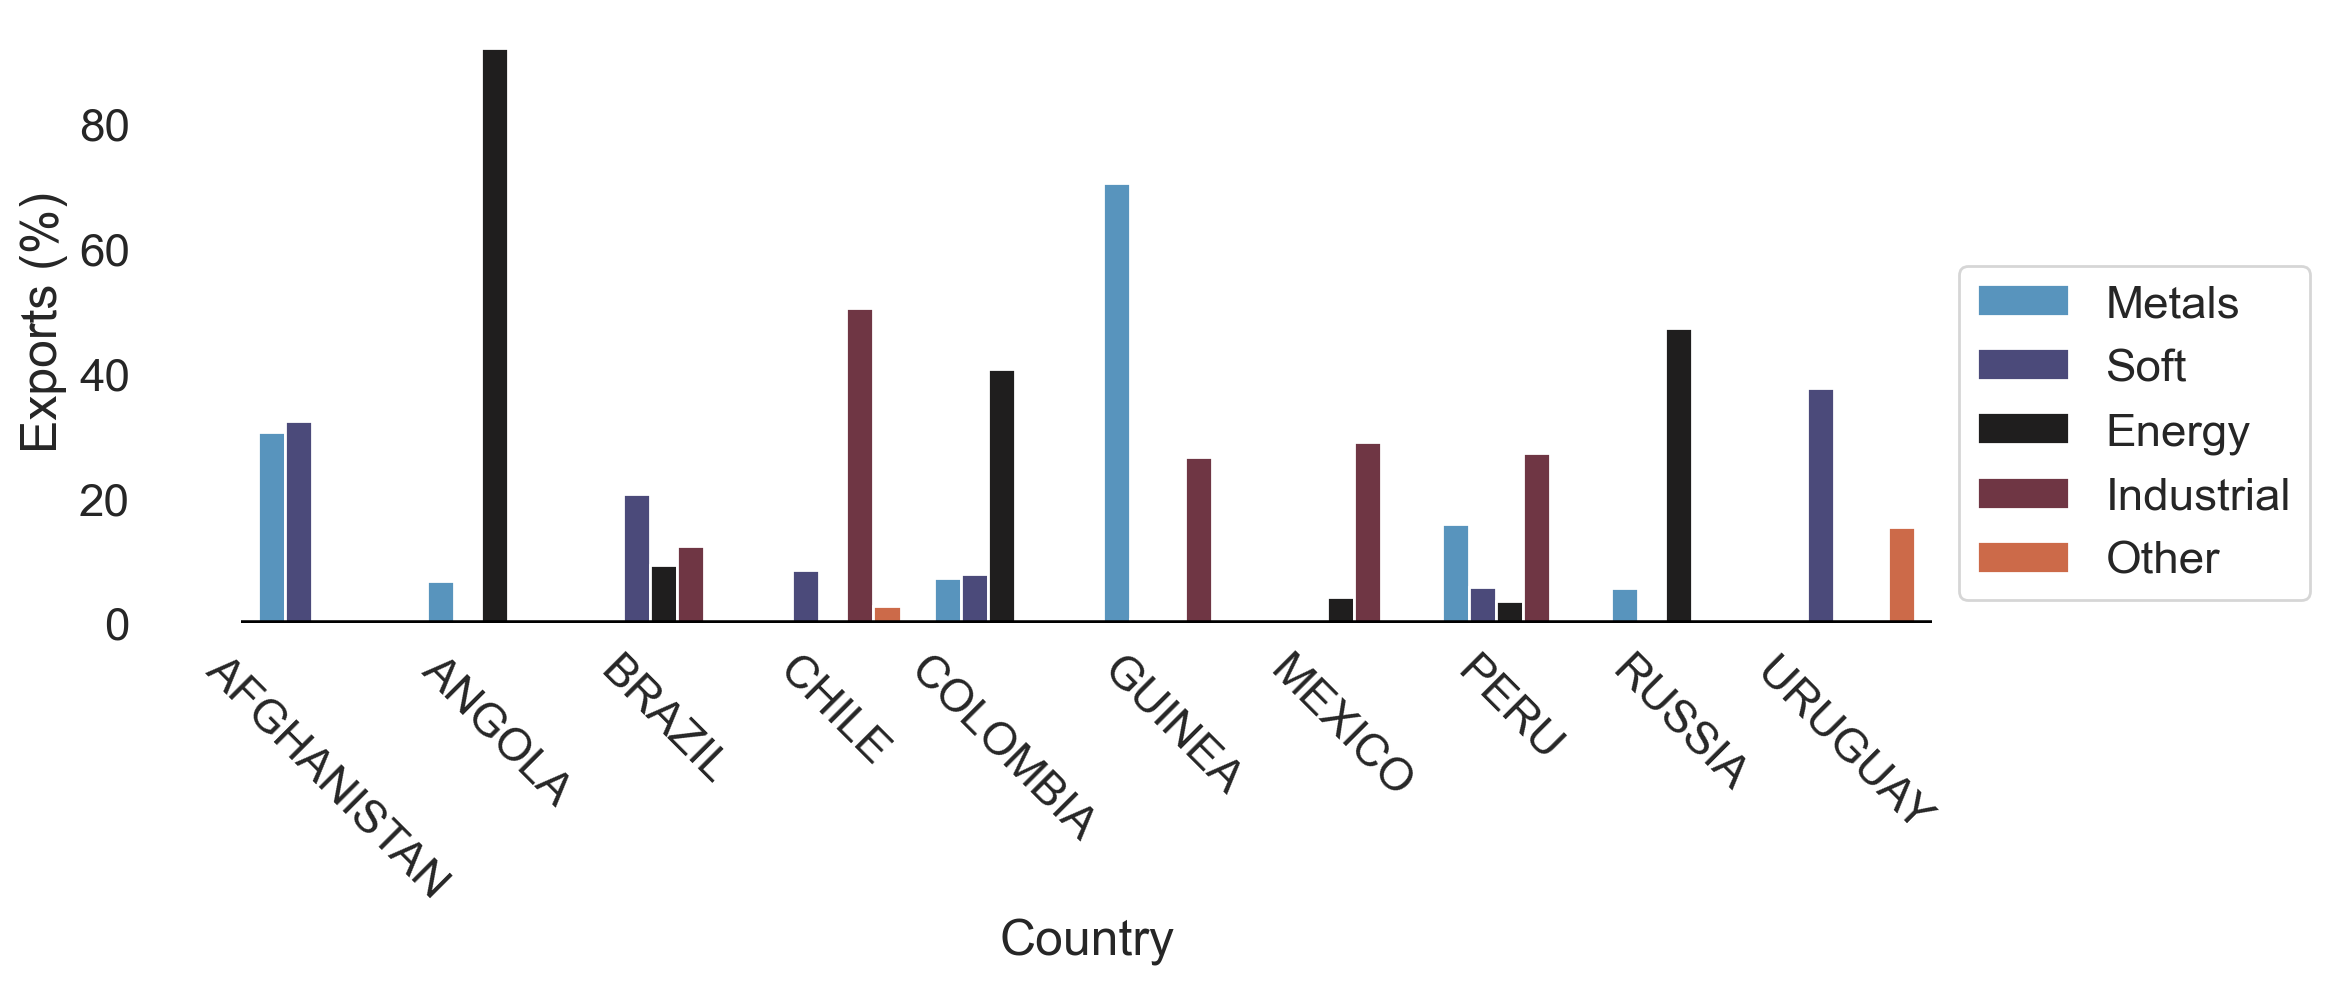

In [211]:
fig, ax = plt.subplots(figsize=(12,4),dpi=200)
sns.set_theme(style="white",font_scale=1.5)
sns.barplot(x="Country", ax=ax, y="Exports (%)", hue="Category", 
            data=ttt, palette='icefire')
ax.hlines(0, -0.5, 9.5,color='black', linewidth=2)

ax.legend(bbox_to_anchor=(1.17,0), loc='lower right') 
plt.xticks(rotation=-45)

for _spine in ["right", "top", "left", "bottom"]:
    ax.spines[_spine].set_visible(False)


In [217]:
top_imports = pd.read_csv('Top_Imports_By_Category.csv')

In [218]:
iii = top_imports.groupby(by=['Country','Category']).sum().reset_index()

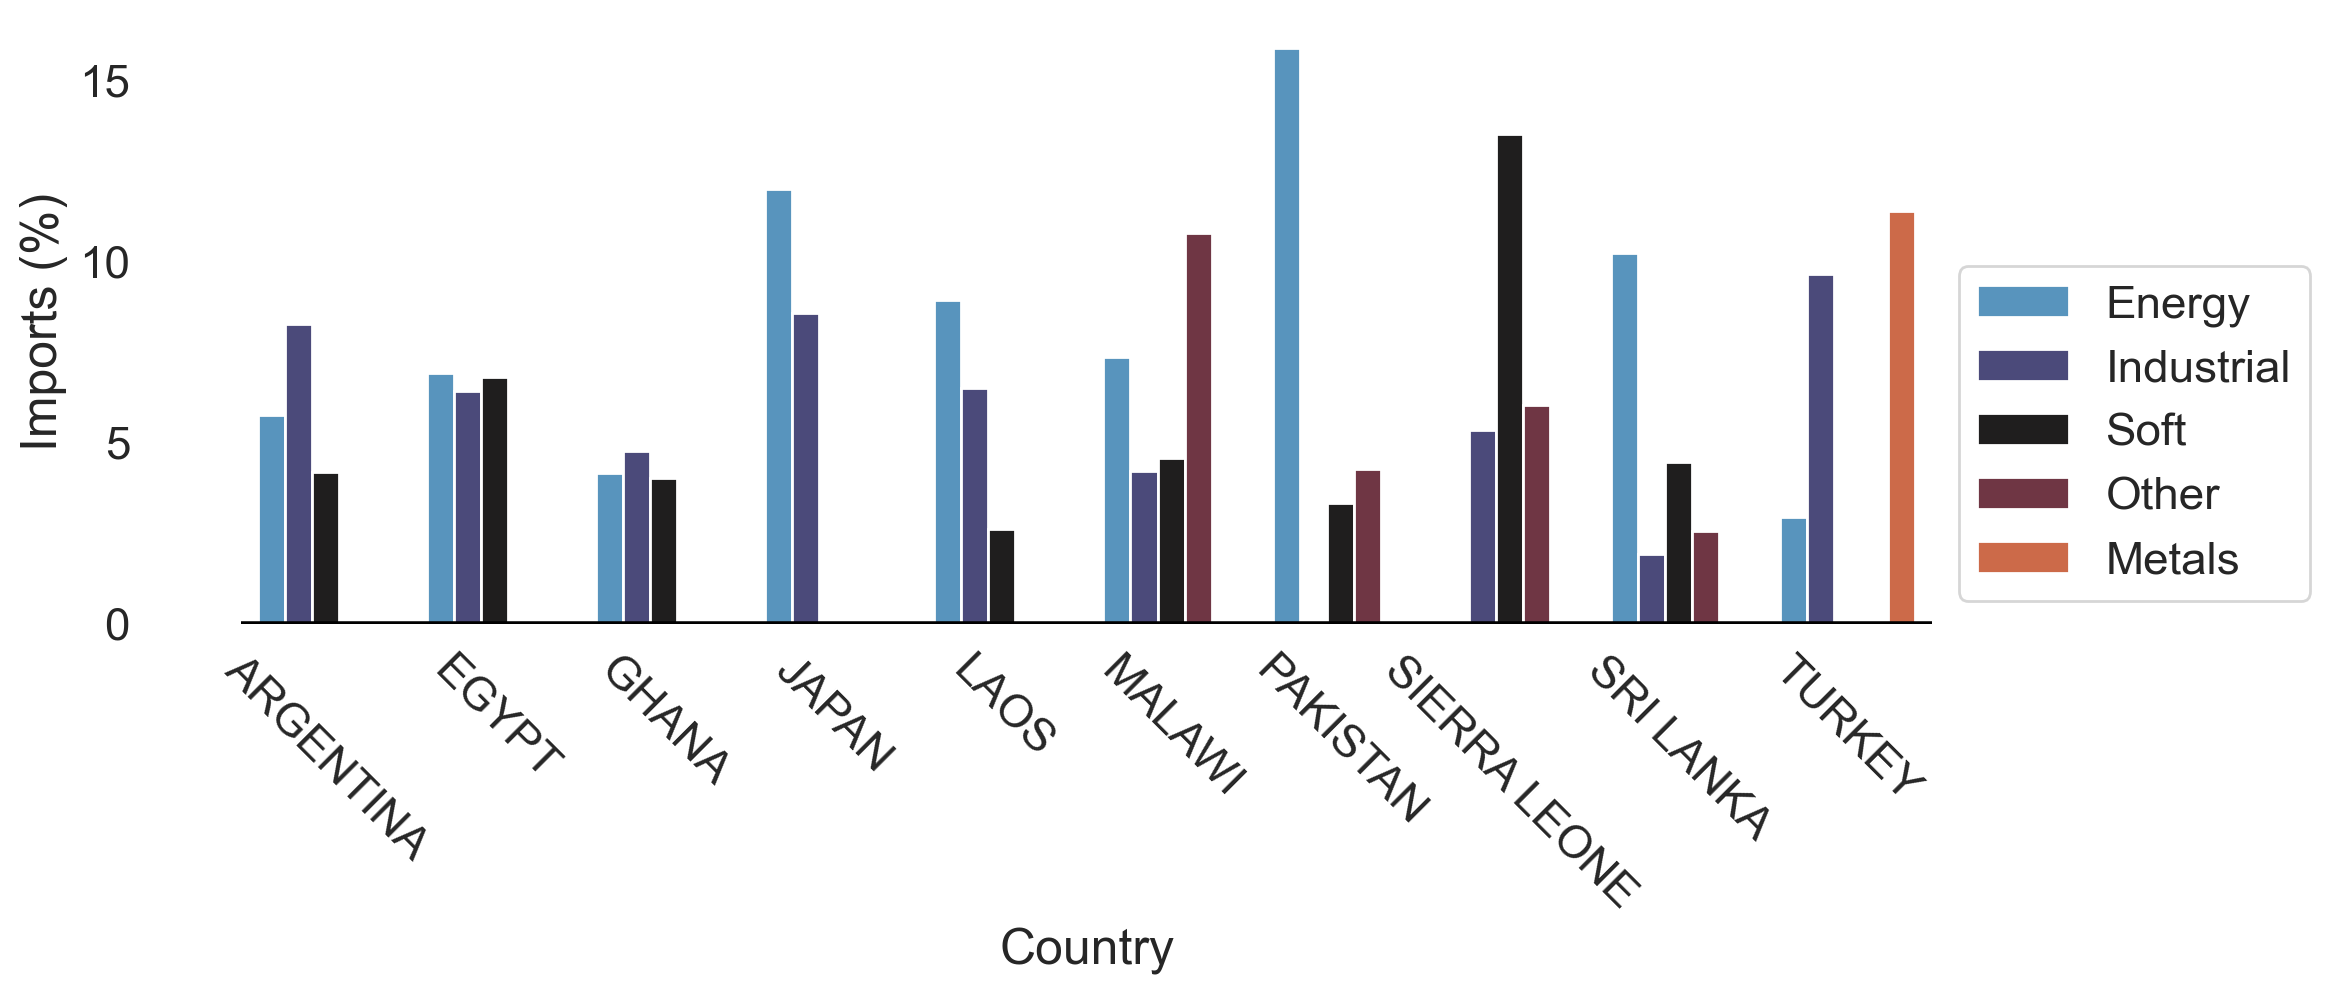

In [219]:
fig, ax = plt.subplots(figsize=(12,4),dpi=200)
sns.set_theme(style="white",font_scale=1.5)
sns.barplot(x="Country", ax=ax, y="Imports (%)", hue="Category", 
            data=iii, palette='icefire')
ax.hlines(0, -0.5, 9.5,color='black', linewidth=2)

ax.legend(bbox_to_anchor=(1.17,0), loc='lower right') 
plt.xticks(rotation=-45)

for _spine in ["right", "top", "left", "bottom"]:
    ax.spines[_spine].set_visible(False)
